#llm using langraph

In [53]:
from langchain_groq import ChatGroq
from langgraph.graph import START,StateGraph,END
from typing import Annotated
from typing import TypedDict
from IPython.display import display,Image
from langgraph.graph.message import add_messages

In [41]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [51]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [52]:
llm=ChatGroq(model="gemma2-9b-it")

In [43]:
llm.invoke("what is gen ai")

AIMessage(content='"Gen AI" is short for **Generative Artificial Intelligence**. \n\nIt\'s a type of AI that focuses on creating new content, rather than simply analyzing existing data. Think of it as AI that can **generate** things like:\n\n* **Text:** Stories, poems, articles, code, dialogue\n* **Images:** Photos, artwork, graphics\n* **Audio:** Music, sound effects, speech\n* **Video:** Short clips, animations\n* **Other data:** 3D models, chemical compounds\n\n**How it works:**\n\nGen AI models are typically trained on massive datasets of existing content. They learn the patterns and structures within this data, and then use that knowledge to create new content that resembles the training data.\n\n**Popular examples:**\n\n* **ChatGPT:** Generates human-like text in response to prompts.\n* **DALL-E 2:** Creates images from text descriptions.\n* **Midjourney:** Another image generation tool popular for its artistic style.\n* **Jukebox:** Generates music in various styles.\n\n**Potent

In [44]:
class AgentState(TypedDict):
    messages:Annotated[list,add_messages]

In [45]:
def ai_assisstance(state:AgentState):
    messages=state["messages"]
    response=llm.invoke(messages)
    return {"messages":[response]}

In [46]:
graph=StateGraph(AgentState)

In [47]:
graph.add_node("llm",ai_assisstance)
graph.set_entry_point("llm")
graph.set_finish_point("llm")

In [48]:
app=graph.compile()

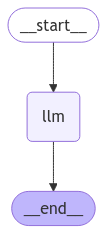

In [49]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except  Exception as e:
    print(e)

In [50]:
app.invoke({"messages":["what is transformer"]})

{'messages': [HumanMessage(content='what is transformer', additional_kwargs={}, response_metadata={}, id='712db6d6-85b6-4409-b988-584a661a5144'),
  AIMessage(content="A transformer, in the context of artificial intelligence, is a type of neural network architecture specifically designed for processing sequential data, like text or audio. \n\nHere's a breakdown:\n\n**What makes transformers special?**\n\n* **Attention Mechanism:** This is the heart of a transformer. It allows the model to focus on specific parts of the input sequence that are most relevant to the task at hand. Imagine reading a sentence and paying more attention to certain words than others – that's what attention does.\n\n* **Parallel Processing:** Transformers can process entire input sequences simultaneously, unlike traditional recurrent neural networks (RNNs) which process information sequentially. This makes them much faster to train and can handle longer sequences more effectively.\n\n* **Encoder-Decoder Structure